# Overview

I want to visualize the neural network strcture. So below is the code to visuaize the MLP(Multilayer Perceptron) architecture.


# Network Architecture Visualization(using Graphviz)



In [1]:
from graphviz import Digraph

def visualize_mlp(input_size, hidden_layers, output_size):
    dot = Digraph(comment='MLP Architecture', format='png')
    
    # Create nodes for the input layer
    for i in range(input_size):
        dot.node(f'I{i}', f'Input {i+1}', shape='circle')
    
    # Create nodes for each hidden layer and store them
    hidden_nodes = []
    for layer_idx, num_neurons in enumerate(hidden_layers):
        current_layer = []
        for neuron in range(num_neurons):
            node_id = f'H{layer_idx}_{neuron}'
            dot.node(node_id, f'H{layer_idx+1}-{neuron+1}', shape='circle')
            current_layer.append(node_id)
        hidden_nodes.append(current_layer)
    
    # Create nodes for the output layer
    output_nodes = []
    for i in range(output_size):
        node_id = f'O{i}'
        dot.node(node_id, f'Output {i+1}', shape='circle')
        output_nodes.append(node_id)
    
    # Connect input layer to first hidden layer
    for input_node in [f'I{i}' for i in range(input_size)]:
        for hidden_node in hidden_nodes[0]:
            dot.edge(input_node, hidden_node)
    
    # Connect hidden layers to each other (if multiple hidden layers exist)
    for l in range(len(hidden_nodes) - 1):
        for node_from in hidden_nodes[l]:
            for node_to in hidden_nodes[l+1]:
                dot.edge(node_from, node_to)
    
    # Connect last hidden layer to output layer
    for hidden_node in hidden_nodes[-1]:
        for output_node in output_nodes:
            dot.edge(hidden_node, output_node)
    
    return dot

# Example usage: visualize an MLP with 3 input nodes, two hidden layers (5 and 4 neurons), and 2 output nodes
mlp_diagram = visualize_mlp(input_size=2, hidden_layers=[6, 6, 6], output_size=1)
mlp_diagram.render('mlp_architecture', view=True)

'mlp_architecture.png'

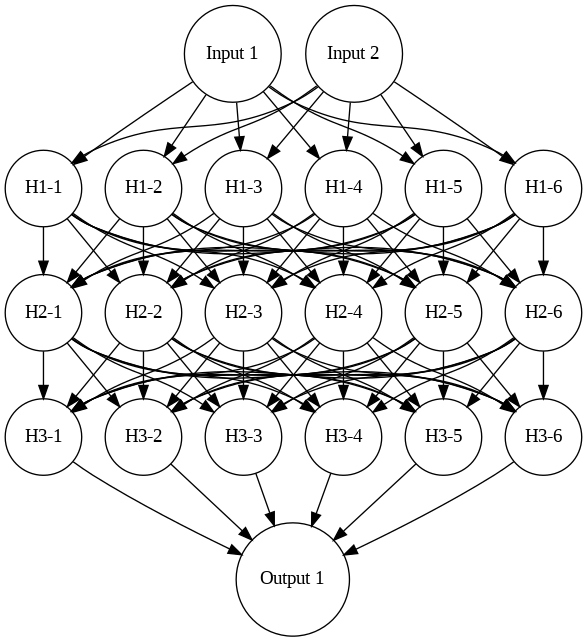

In [2]:
from IPython.display import Image, display
display(Image(filename='/kaggle/working/mlp_architecture.png'))

# Decision boundary Visualization

> This section is not related to previous section too much.

Visualize the decision boundaries of an MLP trained on a 2D dataset using scikit-learn and matplotlib. (Plotly does not work in the Kaggle environment these days.)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


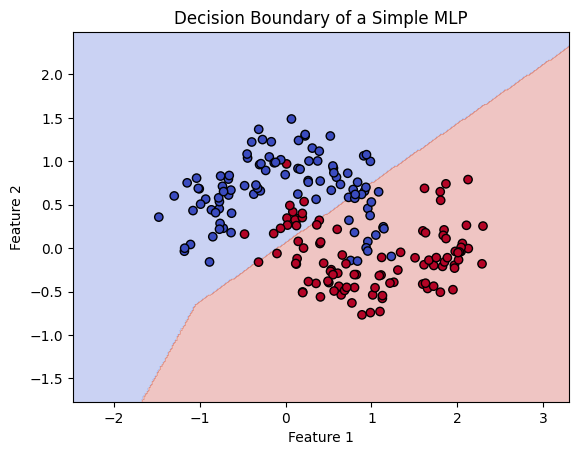

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier

# Generate a 2D dataset (e.g., moons dataset)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Create and train an MLP with one hidden layer (5 neurons)
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
mlp.fit(X, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# np.meshgrid takes these twon one dimensional arrays and procudes two two-dimensional arrays:xx and yy.
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict the class for each point on the grid
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary of a Simple MLP")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
